# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Alexandra Coffin
### Repository: https://github.com/accoffin12/web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [98]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                  Version
------------------------ --------
anyio                    3.7.0
appdirs                  1.4.4
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asgiref                  3.7.2
asttokens                2.2.1
attrs                    23.1.0
backcall                 0.2.0
beautifulsoup4           4.12.2
black                    23.7.0
bleach                   6.0.0
blis                     0.7.9
bokeh                    3.2.1
branca                   0.6.0
catalogue                2.0.8
certifi                  2023.5.7
cffi                     1.15.1
charset-normalizer       3.1.0
click                    8.1.6
colorama                 0.4.6
colorcet                 3.0.1
comm                     0.1.4
confection               0.1.0
contextvars              2.4
contourpy                1.1.0
cycler                   0.11.0
cymem                    2.0.7
debugpy                  1.6.6
decorator                5

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [99]:
import requests
import pickle

url = 'https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/'

try:
    #fetch html content from url
    response = requests.get(url)
    if response.status_code == 200:
        article_html = response.text

        with open("article_html.pkl", "wb") as file:
            pickle.dump(article_html, file)
        print("Article html saved to 'article_html.pkl' succesfully.")
    else:
        print(f" Failed to fetch the URL. Status code: {response.status_code}")
except requests.RequestException as e:
    print(f"Error while fetching url: {e}")

Article html saved to 'article_html.pkl' succesfully.


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [100]:
import pickle
from bs4 import BeautifulSoup

try:
    with open("article_html.pkl", "rb") as file:
        article_html = pickle.load(file)
    
    soup = BeautifulSoup(article_html, "html.parser")

    article_text = soup.get_text()
    print(article_text)

except FileNotFoundError:
    print("File 'article_html.pkl' not found. Run the code from Q1")
except Exception as e:
    print(f"Error occured: {e}")
















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype l

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [101]:
import spacy
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS
import pickle
from bs4 import BeautifulSoup


def preprocess_txt(text):
    # Load spacy
    nlp = spacy.load('en_core_web_lg')

    #process the article
    doc = nlp(article_text)
    stop_words = nlp.Defaults.stop_words
    stop_words |= {"comment", "march", "2021", "says", "report", "reply", "22"}

    interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]

    #tokens = [token.text.lower() for token in doc if token.text.lower() not in stop_words and token.text.lower() not in string.punctuation and not token.is_space]
    return interesting_tokens


try:
        with open("article_html.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, 'html.parser')
            article_text = soup.get_text()
            tokens = preprocess_txt(article_text)

            most_common_tokens = Counter(tokens).most_common(5)
            print("Five most frequent tokens:")
            for token, frequency in most_common_tokens:
                print(f"{token}: {frequency}")
except FileNotFoundError:
    print("File 'article_html.pkl' not found.")
except Exception as e:
    print(f"An error occured: {e}")


Five most frequent tokens:
hacks: 76
light: 68
laser: 63
headlights: 56
led: 41


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [102]:
import spacy
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS
import pickle
from bs4 import BeautifulSoup

def preprocess_txt(text):
    # Load spacy
    nlp = spacy.load('en_core_web_lg')

    #process the article
    doc = nlp(article_text)
    stop_words = nlp.Defaults.stop_words
    stop_words |= {"comment", "march", "2021", "says", "report", "reply", "22"}

    interesting_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

    #tokens = [token.text.lower() for token in doc if token.text.lower() not in stop_words and token.text.lower() not in string.punctuation and not token.is_space]
    return interesting_lemmas

try:
        with open("article_html.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, 'html.parser')
            article_text = soup.get_text()
            lemmas = preprocess_txt(article_text)
            lemma_frequencies = Counter(lemmas)
            most_common_lemmas = lemma_frequencies.most_common(5)

            print("Top 5 most frequent lemmas:")
            for lemma, frequency in most_common_lemmas:
                 print(f"'{lemma}': {frequency}")

except FileNotFoundError:
    print("File 'article_html.pkl' not found.")
except Exception as e:
    print(f"An error occured: {e}")


Top 5 most frequent lemmas:
'light': 99
'headlight': 73
'laser': 72
'car': 63
'beam': 53


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [103]:
import spacy
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS
import pickle
from bs4 import BeautifulSoup
nlp = spacy.load('en_core_web_lg')
#process the article
doc = nlp(article_text)
interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]
interesting_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

def score_sentence_by_token(sentence, interesting_token):
    words = sentence.lower().split()
    num_words = len(words)
    num_interesting = sum(1 for word in words if word in interesting_token)
    return num_interesting / num_words

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and token.lower_ not in STOP_WORDS]
    num_words = len(lemmas)
    num_interesting = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return num_interesting / num_words

# Test the scoring functions using first sentence
first_sentence = article_text.split(".")[0]
print("Score of the first sentence using tokens:", score_sentence_by_token(first_sentence, interesting_tokens))
print("Score of the first sentence using lemmas:", score_sentence_by_lemma(first_sentence, interesting_lemmas))

Score of the first sentence using tokens: 0.8
Score of the first sentence using lemmas: 1.0


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

<function matplotlib.pyplot.show(close=None, block=None)>

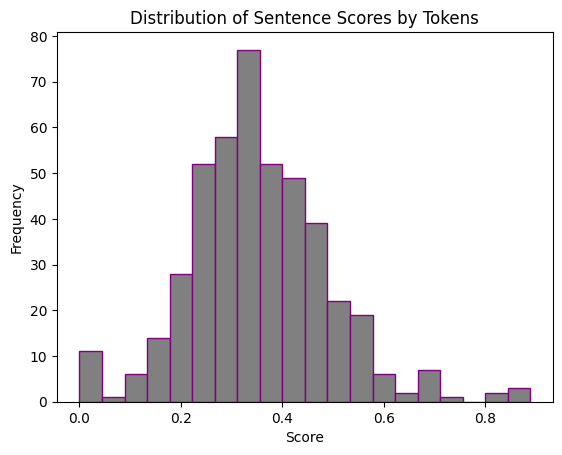

In [104]:
import matplotlib.pyplot as plt

sentences = [sent.text for sent in doc.sents]

# Adding interesting tokens and scores
stop_words = nlp.Defaults.stop_words
stop_words |= {"comment", "march", "2021", "says", "report", "reply", "22"}

interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]

scores_by_tokens = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]
plt.hist(scores_by_tokens, bins=20, color='grey', edgecolor="purple")
plt.title("Distribution of Sentence Scores by Tokens")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

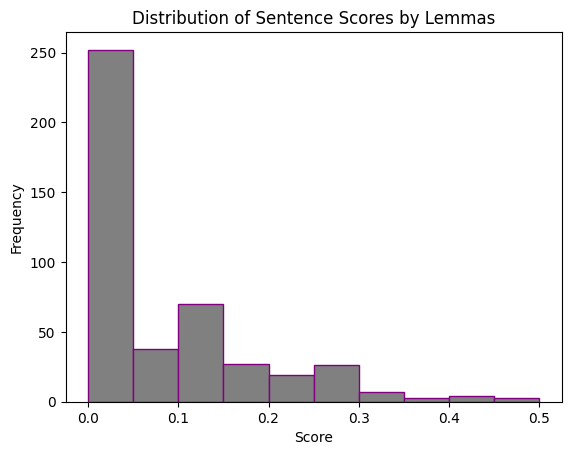

In [105]:
import matplotlib.pyplot as plt

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    stop_words = nlp.Defaults.stop_words
    stop_words |= {"comment", "march", "2021", "says", "report", "reply", "22"}
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and token.lower_ not in stop_words]
    num_words = len(lemmas)
    num_interesting = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    if num_words != 0:
        return num_interesting / num_words
    else: return 0

#Creating lemmas Score def
interesting_lemmas = [lemma for lemma, _ in most_common_lemmas]
sentences = [sent.text for sent in doc.sents]
scores_by_lemmas = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

# Plot the histogram of sentence scores
plt.hist(scores_by_lemmas, bins=10, color='grey', edgecolor="purple")
plt.title("Distribution of Sentence Scores by Lemmas")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

# Explanation:

Initially when I filtered my data I added words to stop_words, these were the initial results of the first sweep without the modifier. The reason being that these words were not included in the traditional ense of Stop_Words in the NLP. By adding these I was able to grab the most common but unique words of each group. There is anohter way to do this which is actually bellow, it's two pieces of code that when exicuted act a little differently than simply adding to the stop_words list. By using these functions we are able to get these directly and we don't have to do any "cleaning". In this case the stop_words that fell outside of the perview of the code were:  

*   top_words |= {"comment", "march", "2021", "says", "report", "reply", "22"}

All of these are problematic due to the nature of the original matterial. The source matterial was a blog post from March 2021, which would generate the highly common variables. Rather than seeking all of the nouns, I had decided initially to add these words to the list and see what remained. 

When we apply the two adjustments for Nouns something interesting happens. The results that I had gotten for the articles are very similar. This is inpart because I had added specific words to the stop list as well as ensure that the entire document was made lowercase before running these filters. By transforming the entire file into lowercase it allow for me to grab all of the stops that were both lower and upper case. 

# Running the Lemma modification:
Below I've run the top most frequent lemmas using the "NOUN" call. This results in a change between the two. 

### STOP_LIST_MODIFIED Top 5 most frequent lemmas:
'light': 99
'headlight': 73
'laser': 72
'car': 63
'beam': 53

### "NOUN" 
Top 5 most frequent lemmas:
'light': 74
'car': 63
'laser': 61
'headlight': 59
'beam': 53

The first major difference is the application of different words, for example by limiting the search of these words to only NOUNs we have eliminated the use of these words putside of this role. For example "light", which the original list has pulled 99 times, but when we search for it in the context of a noun this number decreases. The reason being that "light" can serve as a noun, adjudective and verb. Meaning that the initial is counting this word regardless of function in the sentence where as the second only identifies it as a noun. This is also how we see a major difference in laser and headlight. Headlight is interesting when examining lemmas, as lemmas examine base words and in this instance headlight actually has two - "head" and "light. The combination of two nouns can be interesting and is also why the count for "light" is high as the lemma is looking at base words, rather than tokenizing the word in it's entirty. Lemmatizing is also difficult in that it can cahgne the word entirly depending on the context, which is also why "headlight" is so intriguing. 

# The Graph:
Doesn't really change based on this and it's more a result of the actual words selected compared to the original selection.

Top 5 most frequent lemmas using NOUN:
'light': 74
'car': 63
'laser': 61
'headlight': 59
'beam': 53


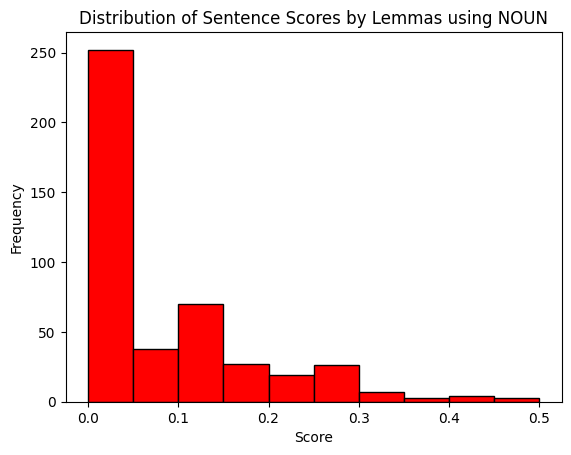

In [106]:
# Example using NOUN modifier in Lemma Token Generator
import pickle
import spacy
from collections import Counter
import string

# For finding "NOUN" with lemma
nlp = spacy.load("en_core_web_sm")

def preprocess_txt(text):
    doc = nlp(text)
    filtered_tokens = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN" and not token.is_punct and not token.is_stop]
    return filtered_tokens

try:
        with open("article_html.pkl", "rb") as file:
            soup = BeautifulSoup(article_html, "html.parser")
            article_text = soup.get_text()
            lemmas = preprocess_txt(article_text)
            lemma_frequencies = Counter(lemmas)
            most_common_lemmas = lemma_frequencies.most_common(5)
            print("Top 5 most frequent lemmas using NOUN:")
            for lemma, frequency in most_common_lemmas:
                print(f"'{lemma}': {frequency}")
            
            #Creating lemmas Score def
            interesting_lemmas = [lemma for lemma, _ in most_common_lemmas]
            sentences = [sent.text for sent in doc.sents]
            scores_by_lemmas = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

            # Plot the histogram of sentence scores
            plt.hist(scores_by_lemmas, bins=10, color='red', edgecolor="black")
            plt.title("Distribution of Sentence Scores by Lemmas using NOUN")
            plt.xlabel("Score")
            plt.ylabel("Frequency")
            plt.show()
except FileNotFoundError:
    print("File 'article_html.pkl' not found.")
except Exception as e:
    print(f"An error occured: {e}")



# Tokenizing using NOUN:
Tokenizing is different in that rather than looking for base words utilizing NLP, we are breaking the text into smaller units through a process to create tokens, which includes punctuation, numbers and so on. The result is that the program only counts words that are identical, and doesn't impact the meaning of the words. As the program opperates this way its ability to pick up NOUNs is different as tokenizing ties the function of the word to it's traditional role. 

### Stop_list Modified Original Five most frequent tokens:
hacks: 76,
light: 68,
laser: 63,
headlights: 56,
led: 41

### Top 5 most frequent tokens (Nouns):
'light': 74,
'car': 63,
'laser': 61,
'headlight': 59,
'beam': 53

Immediatly there is a difference. First is that words like "hacks" and "led" are no longer on the list. Instead "beam" and "car" have made the list, replacing "hacks" which is a noun, verb and adjective in use. By it disappear its clear that "hacks" was applied in multiple fashions and occupying different roles beyond serving as a noun. LED is interesting as it will treat it as a verb rather than a noun. While in the context of the article LED would refer to a noun, in this case as the tokenizer igrnoes context and only examines the word based on the defaul where "led" is a past tense of a verb, it will not show up as a noun. 

Top 5 most frequent tokens (Nouns):
'light': 74
'car': 63
'laser': 61
'headlight': 59
'beam': 53


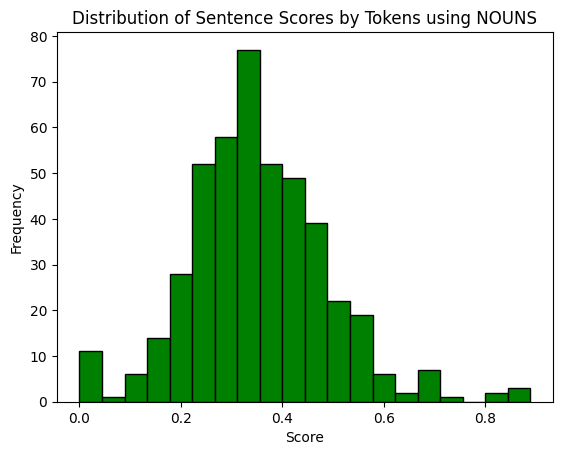

In [107]:
## For finding "NOUN" with Tokens
def preprocess_txt(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if token.pos_ == "NOUN" and token.text.lower() not in STOP_WORDS and token]
    return tokens

# Apply dictionaries and seeing results

try:
        with open("article_html.pkl", "rb") as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, "html.parser")
            article_text = soup.get_text()

            tokens = preprocess_txt(article_text)
            most_common_tokens = Counter(tokens).most_common(5)
            print("Top 5 most frequent tokens (Nouns):")
            for token, frequency in most_common_lemmas:
                print(f"'{token}': {frequency}")
            sentences = [sent.text for sent in doc.sents]

        # Adding interesting tokens and scores

        interesting_tokens = [token.text.lower() for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.lower() not in string.punctuation and not token.is_space]

        scores_by_tokens = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]
        plt.hist(scores_by_tokens, bins=20, color='green', edgecolor="black")
        plt.title("Distribution of Sentence Scores by Tokens using NOUNS")
        plt.xlabel("Score")
        plt.ylabel("Frequency")
        plt.show          
except FileNotFoundError:
    print("File 'article_html.pkl' not found.")
except Exception as e:
    print(f"An error occured: {e}")
